In [1]:
import json
from monty.json import MontyDecoder,MontyEncoder
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

delta_in=0.1

# with open("Ti_data_both.json") as f:
with open("../data_processing/data/Ti_data_0307.json") as f:
    data_collection=json.loads(f.read(),cls=MontyDecoder)

In [2]:
bd=0
for data in data_collection:
    try:
        if data['metadata']['perturbation']=="icsd" and data['calc']=="final" and data['metadata']['proto']=="omega":
            bd=data['energy']/len(data['structure'].species)
    except:
        pass

assert bd!=0

In [3]:
per=set()
for data in data_collection:
    if data['calc']=='final':
        per.add(data['metadata']['perturbation'])

per

{'aimd',
 'gb',
 'gsfe',
 'icsd',
 'pairs',
 'pathways',
 'phonons',
 'strain',
 'surfaces',
 'vacancies',
 'vacancies_ideal',
 'volumetric'}

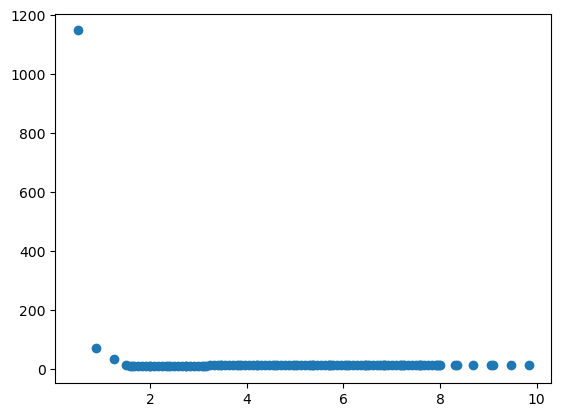

In [4]:
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and len(data['structure'].species)==2 and data['metadata']['perturbation']=='pairs':
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))
        # print(data)

from matplotlib import pyplot as plt
plt.scatter(data_computeparam_distance,data_computeparam_energy)
# plt.ylim([0,20])

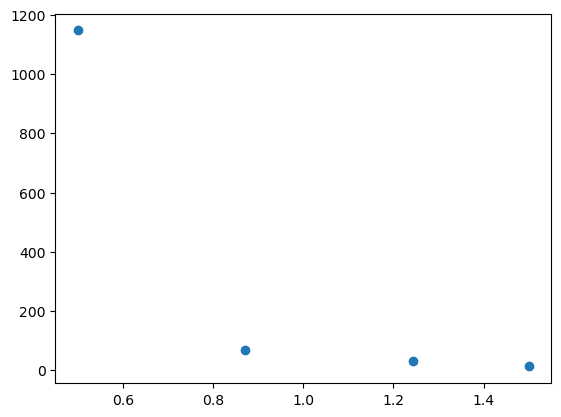

In [5]:
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
plt.scatter(data_computeparam_distance,data_computeparam_energy)


In [6]:
def Energy_core(r,w0,w1,C):
    return w0*np.exp(-w1*r**2)/r+C

In [7]:
def fit(rin):
    data_computeparam_energy=[]
    data_computeparam_distance=[]

    for data in data_collection:
        if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
            data_computeparam_energy.append(data['energy']-2*bd)
            data_computeparam_distance.append(data['structure'].get_distance(0,1))

    data_computeparam_energy=np.array(data_computeparam_energy)
    data_computeparam_distance=np.array(data_computeparam_distance)
    popt, pcov = curve_fit(Energy_core, data_computeparam_distance, data_computeparam_energy)
    x=np.arange(1e-3,rin,1e-3)
    plt.figure(figsize=(3,2))
    plt.plot(x,Energy_core(x,*popt))
    plt.scatter(data_computeparam_distance,data_computeparam_energy)
    plt.xlim([0.3,2.0])
    plt.ylim([-1e3,5e3])
    plt.show()
    rho_core=Energy_core(rin-delta_in,*popt)
    print(popt,rho_core)
    plt.close()



/opt/anaconda3/envs/ase/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


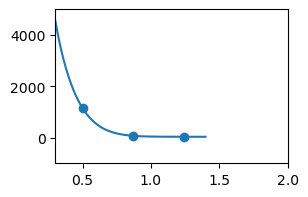

[2246.78910688    5.57402209   32.31063606] 32.450763333558584


In [121]:
fit(1.4)

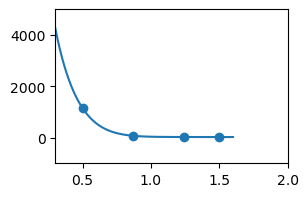

[2022.67668647    5.11849842   22.44442599] 22.457860755591632


In [122]:
fit(1.6)

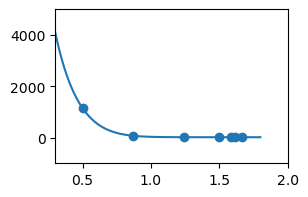

[1895.58522966    4.83259464   15.00224867] 15.003207741787184


In [123]:
fit(1.8)

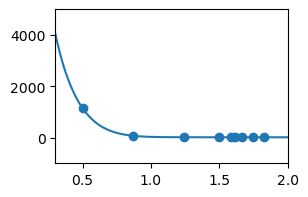

[1867.59720727    4.76650252   13.12982557] 13.129858649747595


In [124]:
fit(2.0)

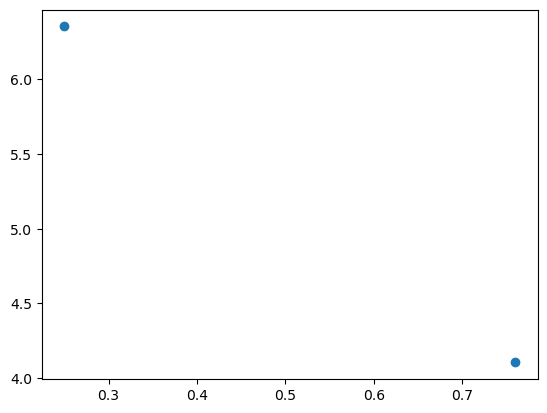

In [11]:
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.scatter(x,y)

In [10]:
import scipy.stats as st
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

w0: 1726.3478706786175
w1: 4.405813746427974
rho_core: 54.077314885116195


w0: 1726.3478706786175
w1: 4.405813746427974
rho_core: 54.077314885116195


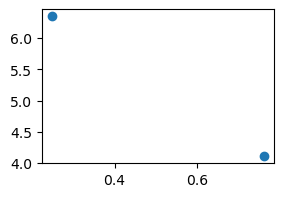

In [12]:
rin=1.0
delta_in=0.1
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
# plt.scatter(data_computeparam_distance,data_computeparam_energy)
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.figure(figsize=(3,2))
plt.scatter(x,y)
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

w0: 572.7780948518093
w1: 1.9129730596246597
rho_core: 17.37807992224907


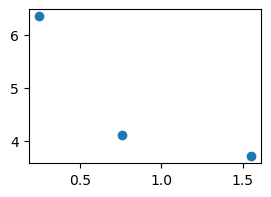

In [13]:
rin=1.4
delta_in=0.1
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
# plt.scatter(data_computeparam_distance,data_computeparam_energy)
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.figure(figsize=(3,2))
plt.scatter(x,y)
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

w0: 435.3470444166723
w1: 1.4900567329763996
rho_core: 10.155858783041365


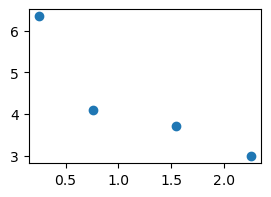

In [14]:
rin=1.6
delta_in=0.1
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
# plt.scatter(data_computeparam_distance,data_computeparam_energy)
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.figure(figsize=(3,2))
plt.scatter(x,y)
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

w0: 346.737672070136
w1: 1.2111505900987343
rho_core: 6.157772157127036


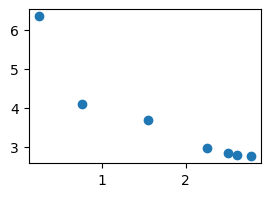

In [15]:
rin=1.8
delta_in=0.1
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
# plt.scatter(data_computeparam_distance,data_computeparam_energy)
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.figure(figsize=(3,2))
plt.scatter(x,y)
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

w0: 274.82389477036475
w1: 1.0228201705176498
rho_core: 3.603464731843634


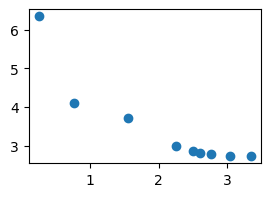

In [16]:
rin=2.0
delta_in=0.1
data_computeparam_energy=[]
data_computeparam_distance=[]

for data in data_collection:
    if data['calc']=='final' and data['metadata']['perturbation']=='pairs' and len(data['structure'].species)==2 and data['structure'].get_distance(0,1)<=rin-delta_in:
        data_computeparam_energy.append(data['energy']-2*bd)
        data_computeparam_distance.append(data['structure'].get_distance(0,1))

data_computeparam_energy=np.array(data_computeparam_energy)
data_computeparam_distance=np.array(data_computeparam_distance)
# plt.scatter(data_computeparam_distance,data_computeparam_energy)
y=np.log(np.array(data_computeparam_energy)*np.array(data_computeparam_distance))
x=np.array(data_computeparam_distance)**2
plt.figure(figsize=(3,2))
plt.scatter(x,y)
slope,intercept,r_value,p_value,std_err=st.linregress(x,y)
w1=-slope
w0=np.exp(intercept)
rho_core=w0*np.exp(-w1*(rin-delta_in)**2)/(rin-delta_in)
print('w0:',w0)
print('w1:',w1)
print('rho_core:',rho_core)

In [17]:
data_computeparam_energy

array([   8.77636592,   13.14686027,    8.31743909,   10.92290193,
          9.57235993,   10.27526518, 1147.63334802,   69.57358223,
         32.63661806])

In [18]:
data_computeparam_distance

array([1.74684, 1.5    , 1.82912, 1.58228, 1.66456, 1.61538, 0.5    ,
       0.8718 , 1.24358])

In [24]:
d=1.58228
E=10.92290193

In [25]:
w0=10000
w1=1
r=d
w0*np.exp(-w1*r**2)/r

516.9072865525582